**In this Notebook , I am going to predict the label 'Is Peak Hour' which takes on the values 0 and 1 , based on the other labels.**

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#The dataset can be found here https://www.kaggle.com/datasets/tanishqdublish/urban-traffic-density-in-cities
df = pd.read_csv('/content/drive/MyDrive/datasets/futuristic_city_traffic.csv')
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


# DATA PREPROCESSING

In [ ]:
df.dtypes

City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object

In [ ]:
df.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
mean,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01
max,2.300000e+01,1.630886e+02,1.000000e+00,1.000000e+00,1.899489e+02,3.377600e+00


In [ ]:
df.shape

(1219567, 11)

In [ ]:
df.isnull().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [ ]:
df.City.value_counts()

Ecoopolis       204179
AquaCity        203405
Neuroburg       203184
SolarisVille    202981
MetropolisX     202981
TechHaven       202837
Name: City, dtype: int64

In [ ]:
df['Vehicle Type'].value_counts()

Autonomous Vehicle    757454
Drone                 304951
Flying Car             78864
Car                    78298
Name: Vehicle Type, dtype: int64

In [ ]:
df['Weather'].value_counts()

Solar Flare              244237
Snowy                    244195
Electromagnetic Storm    243857
Clear                    243650
Rainy                    243628
Name: Weather, dtype: int64

In [ ]:
df['Economic Condition'].value_counts()

Booming      406684
Recession    406571
Stable       406312
Name: Economic Condition, dtype: int64

In [ ]:
df['Hour Of Day'].value_counts()

11    51206
15    51182
17    51166
20    51149
13    51145
21    51035
4     51024
9     51007
16    50989
5     50982
1     50886
0     50858
10    50786
8     50745
14    50721
23    50705
18    50703
22    50615
6     50599
19    50537
7     50451
2     50446
12    50416
3     50214
Name: Hour Of Day, dtype: int64

In [ ]:
df['Is Peak Hour'].value_counts()

0    1030901
1     188666
Name: Is Peak Hour, dtype: int64

In [ ]:
df['Random Event Occurred'].value_counts()

0    1158726
1      60841
Name: Random Event Occurred, dtype: int64

In [ ]:
df_dis = pd.DataFrame()
df_con = pd.DataFrame()

In [ ]:
df_dis = df.loc[:,['City' , 'Vehicle Type' , 'Weather' , 'Economic Condition' , 'Day Of Week' , 'Hour Of Day' , 'Random Event Occurred']]
df_con = df.loc[:,['Speed' , 'Energy Consumption' , 'Traffic Density']]

In [ ]:
df_dis.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Random Event Occurred
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,0
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,0
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,0
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,0
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,0


In [ ]:
df_con.head()

,Speed,Energy Consumption,Traffic Density
0,29.4268,14.7134,0.5241
1,118.8000,143.5682,0.3208
2,100.3904,91.2640,0.0415
3,76.8000,46.0753,0.1811
4,45.2176,40.1934,0.4544


In [ ]:
df_dis = pd.get_dummies(df_dis , columns=['City' , 'Vehicle Type' , 'Weather' , 'Economic Condition' , 'Day Of Week' , 'Hour Of Day' , 'Random Event Occurred'] , prefix=['city' , 'vechicleType' , 'weather' , 'economicCond' , 'day'  , 'hour' , 'randEvent'])

In [ ]:
df_dis.head()

,city_AquaCity,city_Ecoopolis,city_MetropolisX,city_Neuroburg,city_SolarisVille,city_TechHaven,vechicleType_Autonomous Vehicle,vechicleType_Car,vechicleType_Drone,vechicleType_Flying Car,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,randEvent_0,randEvent_1
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_con.head()

,Speed,Energy Consumption,Traffic Density
0,29.4268,14.7134,0.5241
1,118.8000,143.5682,0.3208
2,100.3904,91.2640,0.0415
3,76.8000,46.0753,0.1811
4,45.2176,40.1934,0.4544


In [ ]:
df_con.describe()

,Speed,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06
mean,5.994476e+01,4.946464e+01,2.770960e-01
std,2.663203e+01,2.528014e+01,2.191019e-01
min,6.693400e+00,4.929600e+00,5.900000e-03
25%,3.753310e+01,2.927395e+01,1.059000e-01
50%,5.847110e+01,4.578260e+01,2.186000e-01
75%,8.053455e+01,6.590550e+01,3.960000e-01
max,1.630886e+02,1.899489e+02,3.377600e+00


<Axes: xlabel='Speed', ylabel='Count'>

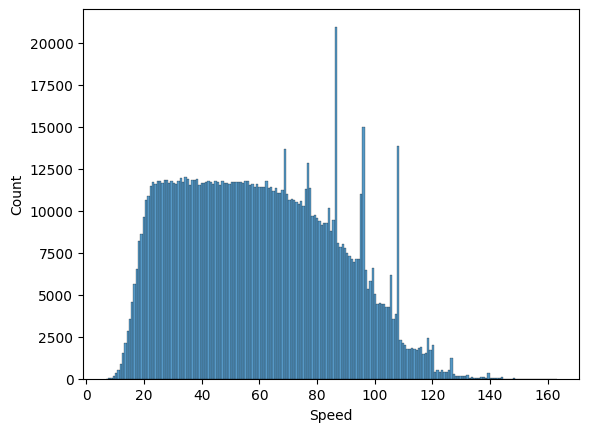

In [ ]:
sns.histplot(df_con['Speed'])

<Axes: xlabel='Energy Consumption', ylabel='Count'>

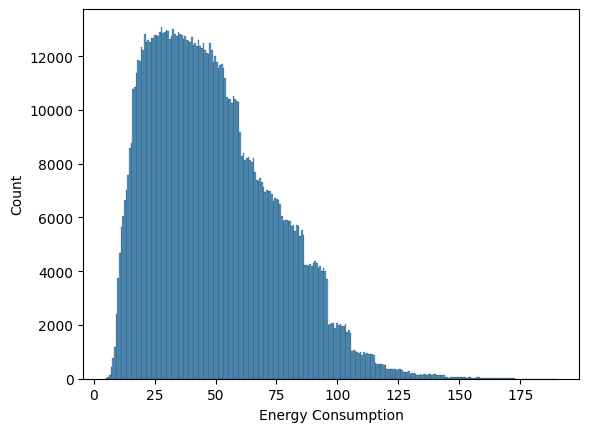

In [ ]:
sns.histplot(df_con['Energy Consumption'])

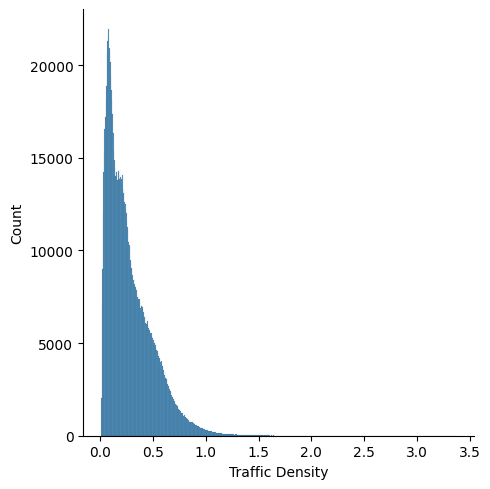

In [ ]:
sns.displot(df_con['Traffic Density'])

In [ ]:
columns = df_con.columns
columns

Index(['Speed', 'Energy Consumption', 'Traffic Density'], dtype='object')

In [ ]:
scaler = StandardScaler()
scaler.fit(df_con)
df_con_scaled = scaler.transform(df_con)

In [ ]:
df_con_scaled_df = pd.DataFrame(df_con_scaled , columns=columns)

In [ ]:
df_con_scaled_df.describe()

,Speed,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06
mean,-1.546270e-17,1.735389e-16,-6.559473e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.999524e+00,-1.761662e+00,-1.237763e+00
25%,-8.415307e-01,-7.986783e-01,-7.813538e-01
50%,-5.533412e-02,-1.456496e-01,-2.669810e-01
75%,7.731217e-01,6.503471e-01,5.426884e-01
max,3.872926e+00,5.557102e+00,1.415098e+01


In [ ]:
df_preprocessed = pd.concat([df_dis , df_con_scaled_df] , axis =1)

In [ ]:
df_preprocessed.describe()

,city_AquaCity,city_Ecoopolis,city_MetropolisX,city_Neuroburg,city_SolarisVille,city_TechHaven,vechicleType_Autonomous Vehicle,vechicleType_Car,vechicleType_Drone,vechicleType_Flying Car,...,hour_19,hour_20,hour_21,hour_22,hour_23,randEvent_0,randEvent_1,Speed,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,...,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
mean,1.667846e-01,1.674193e-01,1.664369e-01,1.666034e-01,1.664369e-01,1.663189e-01,6.210844e-01,6.420147e-02,2.500486e-01,6.466557e-02,...,4.143848e-02,4.194030e-02,4.184682e-02,4.150243e-02,4.157623e-02,9.501126e-01,4.988738e-02,-1.546270e-17,1.735389e-16,-6.559473e-16
std,3.727836e-01,3.733499e-01,3.724725e-01,3.726215e-01,3.724725e-01,3.723668e-01,4.851173e-01,2.451116e-01,4.330409e-01,2.459349e-01,...,1.993022e-01,2.004528e-01,2.002391e-01,1.994493e-01,1.996188e-01,2.177123e-01,2.177123e-01,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.999524e+00,-1.761662e+00,-1.237763e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-8.415307e-01,-7.986783e-01,-7.813538e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-5.533412e-02,-1.456496e-01,-2.669810e-01
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,7.731217e-01,6.503471e-01,5.426884e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.872926e+00,5.557102e+00,1.415098e+01


In [ ]:
df_preprocessed.dtypes

city_AquaCity                        uint8
city_Ecoopolis                       uint8
city_MetropolisX                     uint8
city_Neuroburg                       uint8
city_SolarisVille                    uint8
city_TechHaven                       uint8
vechicleType_Autonomous Vehicle      uint8
vechicleType_Car                     uint8
vechicleType_Drone                   uint8
vechicleType_Flying Car              uint8
weather_Clear                        uint8
weather_Electromagnetic Storm        uint8
weather_Rainy                        uint8
weather_Snowy                        uint8
weather_Solar Flare                  uint8
economicCond_Booming                 uint8
economicCond_Recession               uint8
economicCond_Stable                  uint8
day_Friday                           uint8
day_Monday                           uint8
day_Saturday                         uint8
day_Sunday                           uint8
day_Thursday                         uint8
day_Tuesday

In [ ]:
df_preprocessed.shape


(1219567, 54)

In [ ]:
X_sample = df_preprocessed.iloc[0:50 ,:]
y = df['Is Peak Hour']

In [ ]:
y.shape

(1219567,)

In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Is Peak Hour, dtype: int64

In [ ]:
X_sample.shape

(50, 54)

In [ ]:
y_sample = y.iloc[0:50]

In [ ]:
y_sample.shape

(50,)

In [ ]:
y_sample.head()

0    0
1    0
2    0
3    1
4    0
Name: Is Peak Hour, dtype: int64

In [ ]:
X_sample.head()

,city_AquaCity,city_Ecoopolis,city_MetropolisX,city_Neuroburg,city_SolarisVille,city_TechHaven,vechicleType_Autonomous Vehicle,vechicleType_Car,vechicleType_Drone,vechicleType_Flying Car,...,hour_19,hour_20,hour_21,hour_22,hour_23,randEvent_0,randEvent_1,Speed,Energy Consumption,Traffic Density
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,-1.145912,-1.374646,1.127348
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,2.209943,3.722432,0.199469
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1.518685,1.653447,-1.075281
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0.632894,-0.134071,-0.438134
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,-0.552987,-0.366740,0.809231


# Overfitting a subset of data

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100 , activation='relu' , input_shape=(54,)),
    keras.layers.Dense(1 , activation='sigmoid')
])

model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

model.fit(X_sample , y_sample , epochs =100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 0.5932 - accuracy: 0.7600
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.5527 - accuracy: 0.8200
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 0.5169 - accuracy: 0.8400
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4860 - accuracy: 0.8400
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4586 - accuracy: 0.8400
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.4350 - accuracy: 0.8400
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 0.4123 - accuracy: 0.8400
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 0.3955 - accuracy: 0.8400
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 0.3785 - accuracy: 0.8400
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 0.3640 - accuracy: 0.8400
Epoch 11/100
2/2 [========

In [ ]:
X = df_preprocessed

In [ ]:
X.head()

,city_AquaCity,city_Ecoopolis,city_MetropolisX,city_Neuroburg,city_SolarisVille,city_TechHaven,vechicleType_Autonomous Vehicle,vechicleType_Car,vechicleType_Drone,vechicleType_Flying Car,...,hour_19,hour_20,hour_21,hour_22,hour_23,randEvent_0,randEvent_1,Speed,Energy Consumption,Traffic Density
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,-1.145912,-1.374646,1.127348
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,2.209943,3.722432,0.199469
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1.518685,1.653447,-1.075281
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0.632894,-0.134071,-0.438134
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,-0.552987,-0.366740,0.809231


In [ ]:
X.shape

(1219567, 54)

In [ ]:
y.shape

(1219567,)

In [ ]:
split1 = int(0.7*len(y))
split2 = int(0.85*len(y))
X_train = df_preprocessed.iloc[:split1 , :]
y_train = y.iloc[0:split1]
X_test = df_preprocessed.iloc[split1:split2 , :]
y_test = y.iloc[split1:split2]
X_val = df_preprocessed.iloc[split2: , :]
y_val = y.iloc[split2:]

In [ ]:
X_train.shape

(853696, 54)

In [ ]:
y_test.shape

(182935,)

In [ ]:
X_val.shape

(182936, 54)

# MODEL

In [ ]:
model2 = keras.Sequential([
    keras.layers.Dense(5 , activation='relu' , input_shape=(54,)),
    keras.layers.Dense(1 , activation='sigmoid')
])

model2.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

history = model2.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs =5 ,batch_size=500)

Epoch 1/5
1708/1708 [==============================] - 12s 7ms/step - loss: 0.2141 - accuracy: 0.9134 - val_loss: 0.0627 - val_accuracy: 0.9643
Epoch 2/5
1708/1708 [==============================] - 9s 5ms/step - loss: 0.0398 - accuracy: 0.9736 - val_loss: 0.0264 - val_accuracy: 0.9982
Epoch 3/5
1708/1708 [==============================] - 9s 6ms/step - loss: 0.0183 - accuracy: 0.9998 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 4/5
1708/1708 [==============================] - 6s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/5
1708/1708 [==============================] - 8s 5ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000


# EVALUATION

In [ ]:
model2.evaluate(X_test , y_test)

5717/5717 [==============================] - 16s 3ms/step - loss: 0.0023 - accuracy: 1.0000


[0.0022883466444909573, 1.0]

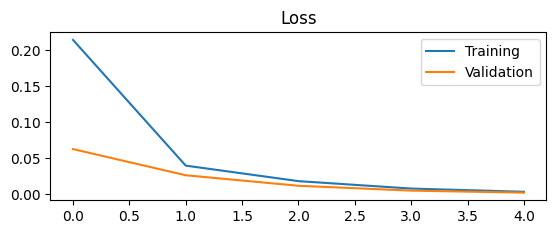

In [ ]:
plt.subplot(211)
plt.title("Loss")
plt.plot(history.history['loss'] , label='train')
plt.plot(history.history['val_loss'] , label='validation')
plt.legend()

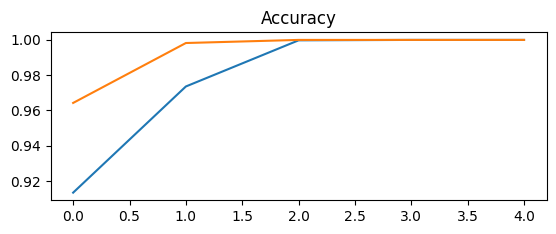

In [ ]:
plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history['accuracy'] , label = 'train')
plt.plot(history.history['val_accuracy'] , label = 'validation')